In [1]:
from utils import *

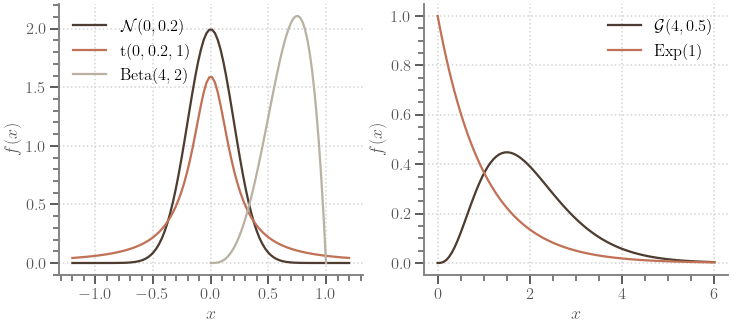

In [1]:
xR = np.linspace(-1.2, 1.2, 100)
x01 = np.linspace(0, 1, 50)
xRp = np.linspace(0, 6, 100)

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(xR, norm.pdf(xR, 0, 0.2), label='$\mathcal{N}(0, 0.2)$')
ax[0].plot(xR, t.pdf(xR, 1, 0, 0.2), label='t$(0, 0.2, 1)$')
ax[0].plot(x01, beta.pdf(x01, 4, 2), label='Beta$(4, 2)$')

ax[1].plot(xRp, gamma.pdf(xRp, 4, 0, 0.5), label='$\mathcal{G}(4, 0.5)$')
ax[1].plot(xRp, expon.pdf(xRp, 0, 1), label='Exp$(1)$')

ax[0].set_xlabel('$x$')
ax[1].set_xlabel('$x$')
ax[0].set_ylabel('$f(x)$')
ax[1].set_ylabel('$f(x)$')

ax[0].legend()
ax[1].legend()
savefig('01_Rozklady_1D');

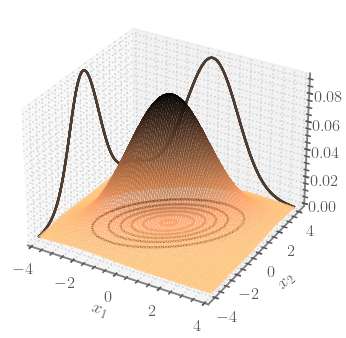

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d', fc = 'white')

xmax = 4
X, Y = np.mgrid[-xmax:xmax:.01, -xmax:xmax:.01]
pos = np.dstack((X, Y))

rv = multivariate_normal([0, 0], [[2, 1], [1, 2]])
Z = rv.pdf(pos)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha = 0.5, cmap = 'copper_r', antialiased=False)
cset = ax.contour(X, Y, Z, zdir='z', offset=-0.0001, cmap='copper')

X, Y = np.mgrid[-0.01:0.01:.01, -xmax:xmax:.01]
pos = np.dstack((X, Y))
Z = rv.pdf(pos)
cset = ax.contour(X, Y, Z, zdir='x', offset=-xmax, colors = palette[0], linestyles='solid')

X, Y = np.mgrid[-xmax:xmax:.01, -0.01:0.01:.01]
pos = np.dstack((X, Y))
Z = rv.pdf(pos)
cset = ax.contour(X, Y, Z, zdir='y', offset=xmax, colors = palette[0],  linestyles='solid')

ax.set_xlim(-xmax, xmax)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.set_zlim(-0.0001, np.max(Z))
plt.tight_layout()

savefig('01_MultivariateGaussian');

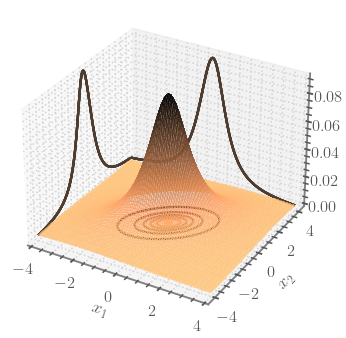

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d', fc = 'white')

xmax = 4
X, Y = np.mgrid[-xmax:xmax:.01, -xmax:xmax:.01]
pos = np.dstack((X, Y))

rv = multivariate_t([0, 0], [[2, 1], [1, 2]], df=0.5)
Z = rv.pdf(pos)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha = 0.5, cmap = 'copper_r', antialiased=False)
cset = ax.contour(X, Y, Z, zdir='z', offset=-0.0001, cmap='copper')

X, Y = np.mgrid[-0.01:0.01:.01, -xmax:xmax:.01]
pos = np.dstack((X, Y))
Z = rv.pdf(pos)
cset = ax.contour(X, Y, Z, zdir='x', offset=-xmax, colors = palette[0], linestyles='solid')

X, Y = np.mgrid[-xmax:xmax:.01, -0.01:0.01:.01]
pos = np.dstack((X, Y))
Z = rv.pdf(pos)
cset = ax.contour(X, Y, Z, zdir='y', offset=xmax, colors = palette[0],  linestyles='solid')

ax.set_xlim(-xmax, xmax)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlim(-0.0001, np.max(Z))
plt.tight_layout()

savefig('01_MultivariateStudent');

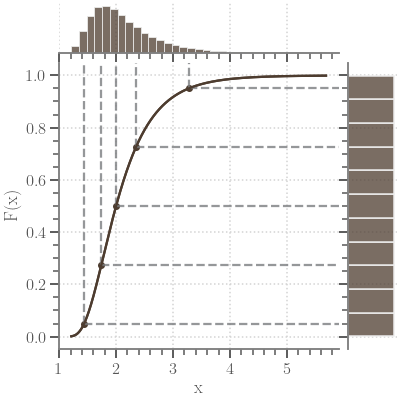

In [8]:
## PIT
dist = lognorm(0.5, 1)
u = np.linspace(0.001, 0.999, 1000)
df = pd.DataFrame.from_dict({'F(x)': u,
                             'x': dist.ppf(u)})
grid = sns.JointGrid(data=df, x="x", y="F(x)")
marg_func = sns.histplot
grid.plot_joint(plt.plot, color=palette[0])    

lines_setup = np.linspace(0.05, 0.95, 5)
for y in lines_setup:
    xlims = plt.xlim()
    ylims = plt.ylim()
    xl = (dist.ppf(y) - xlims[0])/(xlims[1] - xlims[0])
    yl = (y - ylims[0])/(ylims[1] - ylims[0])
    plt.axhline(y=y, xmin=xl, xmax=1, color=palette[8], linestyle='--', alpha=0.8)
    plt.axvline(x=dist.ppf(y), ymin=yl, ymax=1, color=palette[8], linestyle='--', alpha = 0.8)
grid.plot_joint(plt.plot, color=palette[0])        
for y in lines_setup:
    plt.scatter(x = dist.ppf(y), y = y, marker='o', c=palette[0], s=30)
grid.plot_marginals(marg_func, color=palette[0]);

savefig("01_PIT")

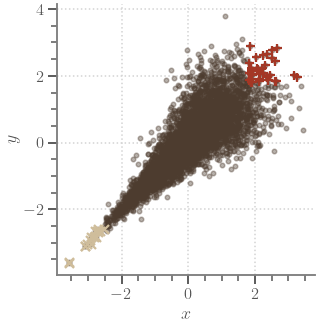

In [9]:
#### Copulas - First examples
copula = pv.Bicop(family=pv.clayton, parameters=[4])
    
data_u_sim = pd.DataFrame(copula.simulate(n=5000, seeds=[123]), 
                          columns = ["$U$", "$V$"])
        
data_u_sim['$X$'] = norm.ppf(data_u_sim['$U$'])
data_u_sim['$Y$'] = norm.ppf(data_u_sim['$V$'])

fig, ax = plt.subplots()
ax.scatter(data_u_sim['$X$'], data_u_sim['$Y$'], marker='.', alpha=0.4)

t_ = 1.8
upper = data_u_sim[(data_u_sim['$X$'] > t_) & (data_u_sim['$Y$'] > t_)]
ax.scatter(upper['$X$'], upper['$Y$'], marker='+', color=palette[3])

t_ = -2.5
lower = data_u_sim[(data_u_sim['$X$'] < t_) & (data_u_sim['$Y$'] < t_)]
ax.scatter(lower['$X$'], lower['$Y$'], marker='x', color=palette[5])

ax.set_aspect('equal', 'box')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
savefig("01_Tail_dependence")